# Paradoxe de Parondo

In [ ]:
pip install sympy

In [1]:
%matplotlib notebook
from fractions import Fraction
from sympy import init_printing, Symbol, simplify, factor, Rational
from sympy.matrices import Matrix, zeros, det
from sympy.functions import transpose
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

# On définit les constantes du TD
epsilon = 1/1000
p = 1/2 - epsilon
p0 = 1/10 - epsilon
p1 = 3/4 - epsilon

# Pour la taille des figures
(w, h) = (9.5, 4)

### Partie 1 : Étude des deux jeux

**T1.**

Notons $ X_n $ la variable aléatoire donnant le gain au n-ième lancer. 
Cela nous permet d'écrire $S_n = \sum_{i = 1}^nX_i$.
Les $X_n$ sont i.i.d et telles que $Y_n = \frac{X_n + 1}{2} \sim \mathcal{B}(p)$. On peut aussi voir que $\sum_{i = 1}^n Y_i = 
\frac{S_n + n}{2} \sim \mathcal{B}(n, p)$, ce qui nous donne rapidement les informations suivantes :

$$\begin{cases} E(S_n) = -2n\varepsilon & \\ \frac{S_n}{n} \underset{n \rightarrow +\infty}{\longrightarrow} - 2 \varepsilon < 0 \ & \ \text{p.s, par loi forte des grands nombres} \end{cases}$$

Enfin, les $Y_n$ étant intégrables on a le théorème central limite qui nous assure que $\sqrt{n}\left( \frac{1}{n}
\sum_{i = 1}^n Y_i - p \right) \underset{n \rightarrow +\infty}{\longrightarrow} \mathcal{N}(0, p(1-p))$ en loi, ce que 
l'on peut aussi réécrire :

$$ \sqrt{n}\left( \frac{S_n}{n} + 2\varepsilon \right)  \underset{n \rightarrow +\infty}{\longrightarrow} 
\mathcal{N}(0, 1 - 4 \varepsilon^2) \quad \ \ \text{en loi}$$

Bref, toutes ces informations convergent vers la même conclusion : jouer à ce jeu va conduire à un gain fortement négatif, et ce presque sûrement. On n'a pas envie de jouer à ce jeu.

**S1.**

On procède à la simulation de nombreuses trajectoires, en y superposant l'espérance calculée. Nous affichons à côté un histogramme de $S_n$. L'organisation du code sera à peu près la même tout le long du devoir : on définit d'abord les fonctions qui nous permettent de procéder aux simulations, que l'on utilise ensuite dans une fonction display permettant de visualiser les résultats.

In [2]:
# On procède à num_path simulations du jeu A avec n = path_length lancers
def simul_path_A(num_path, path_length) :
    return npr.choice([1, -1], p = [p, 1 - p], size = (num_path, path_length)).cumsum(axis=1)

# On récupère une liste final_winnings_list de différentes simulations de S_n.
# On peut ainsi renvoyer l'histogramme de la loi de S_n
# Pour faciliter l'affichage, on revoie un triplet (valeur minimum, valeur maximum, histogramme)
def get_hist(final_winnings_list) :
    a = np.min(final_winnings_list)
    b = np.max(final_winnings_list)
    hist =  np.bincount(final_winnings_list - a, minlength = b-a) / final_winnings_list.size
    return (a, b, hist)

# C'est une fonction qui calcule et affiche le gain moyen de (S_n / n), en spécifiant
# n = path_length et en donnant une liste final_winnings_list de différentes simulations
# de S_n
def mean_winnings(path_length, final_winnings_list) :
    print(r"(epsilon = {}) Gains moyens pour {} parties de {} lancers : {}".format(
        epsilon, 
        final_winnings_list.size, 
        path_length, final_winnings_list.sum() / (final_winnings_list.size * path_length ))
         )
    

<IPython.core.display.Javascript object>


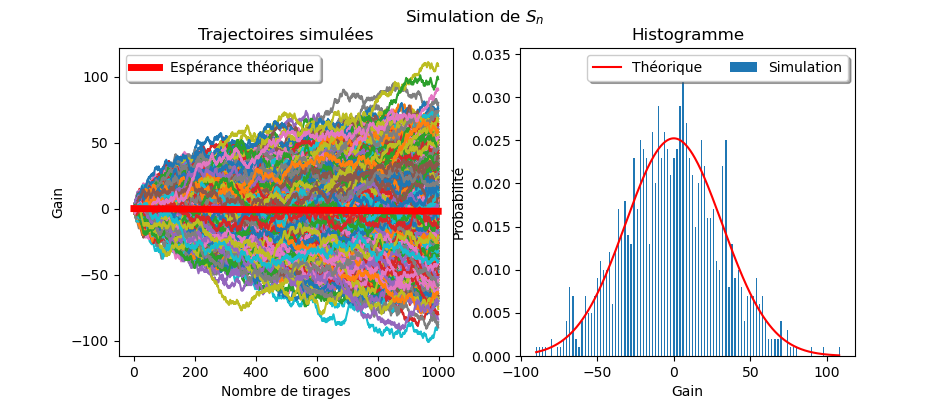

(epsilon = 0.001) Gains moyens pour 1000 parties de 1000 lancers : -0.0014


In [5]:
# Cette fonction procède à num_path simulation du jeu A, avec n = path_length.
# On calcule donc 'num_path' S_n différents.
def display(num_path, path_length) :
    # Pour l'affichage
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(w, h))
    ax1.set_title("Trajectoires simulées")
    ax1.set_xlabel("Nombre de tirages")
    ax1.set_ylabel("Gain")
    ax2.set_title("Histogramme")
    ax2.set_xlabel("Gain")
    ax2.set_ylabel("Probabilité")
    fig.suptitle("Simulation de " + r"$S_n$")
    
    # La subdivision des abscisses
    X = np.arange(path_length)
    
    # Calcul des S_n
    simul = simul_path_A(num_path, path_length)
    
    # Espérance théorique
    esp = - 2 * X * epsilon
    
    # Histogramme
    final_winnings_list = simul[:, -1]
    (a, b, hist) = get_hist(final_winnings_list)
    
    # Affichage des courbes
    for sim in simul :
        ax1.plot(X, sim)
    ax1.plot(X, esp, linestyle="-", color='red', label="Espérance théorique", linewidth=5.0)
    ax1.legend(loc="best", ncol=1, shadow=True)
    
    ax2.bar(np.arange(a, b+1), hist, label="Simulation")
    
    #Theoreme Central limite
    x = np.linspace(a, b, 400)
    s = np.sqrt(path_length)
    ax2.plot(x, 2*sps.norm(- 2 * epsilon * s, s*np.sqrt(1 - 4 * epsilon*epsilon)).pdf(x), color='red', label = r"Théorique")
    ax2.legend(ncol=2, shadow=True, loc="best")
    
    
    plt.show()
    
    # Affichages des gains moyens empiriques sur la console
    mean_winnings(path_length, final_winnings_list)
    
display(1000, 1000)
    
    
    
    

Les résultats empiriques pour 1000 parties de 1000 lancers confortent la conclusion de l'étude théorique. Notons bien que par \textit{gains moyens} on entend bien l'espérance de $\frac{S_n}{n}$. L'expression \textit{gain} correspond en revanche à l'espérance de $S_n$.

**S2.**

On effectue les simulations en suivant le même mode opératoire que précédemment.

In [6]:
# Cette fonction simule num_path jeu B avec path_length lancers.
def simul_path_B(num_path, path_length) :
    simul = np.zeros((num_path, path_length))
    for i in range(num_path) :
        somme = 0
        L = np.zeros(path_length)
        for j in range(path_length) :
            somme += npr.choice([1, -1], p = [p1, 1 - p1]) if somme % 3 else npr.choice([1, -1], p = [p0, 1 - p0])
            L[j] = somme
        simul[i] = L
    return simul


<IPython.core.display.Javascript object>


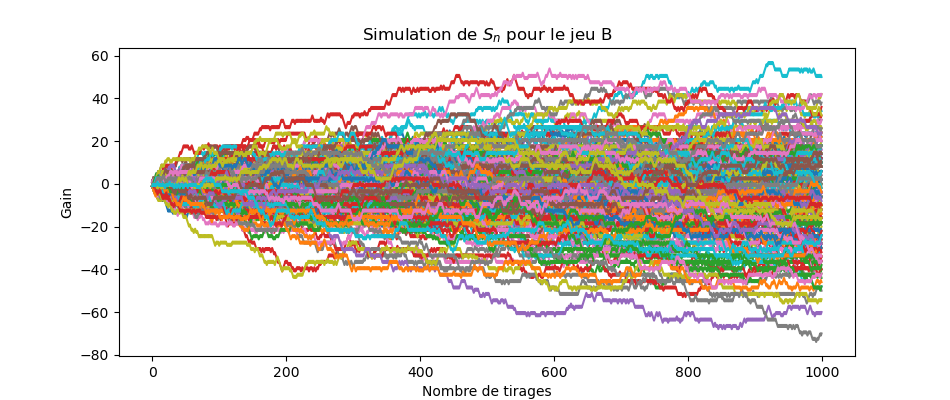

(epsilon = 0.001) Gains moyens pour 200 parties de 1000 lancers : -0.00518


In [7]:
def display(num_path, path_length) :
    X = np.arange(path_length)
    
    #Calcul des S_n
    simul = simul_path_B(num_path, path_length)
    
    #Affichage
    plt.figure(figsize=(w, h)) 
    for sim in simul :
        plt.plot(X, sim)
    plt.title("Simulation de " + r"$S_n$" + " pour le jeu B")
    plt.xlabel("Nombre de tirages")
    plt.ylabel("Gain")
    
    plt.show()
    mean_winnings(path_length, simul[:, -1])
    
display(200, 1000)

Après simulation, on voit que le gain moyen est négatif : on n'a pas envie de jouer.

**T2.**


Tout d'abord, on montre un lemme bien utile :

**Lemme** La matrice de transition en $k$ pas $(P(X_{n + k} = j | X_n = i))_{i, j \in E} = (p_{i, j}^{(k)})_{i, j \in E}$ est égale à $P^k$. Ici $E = \{1,2,3\}$

\begin{proof} On procède par récurrence. Le rang 1 est vraie par définition. Au rang $k$ :
$$
{\mathbb{P}}\left(X_{n}=i{\text{ et }}X_{{n+k}}=j\right) =\sum _{{\ell \in E}}{\mathbb  {P}}\left(X_{n}=i,\,X_{{n+k-1}}=\ell {\text{ et }}X_{{n+k}}=j\right) $$ 
$$ =\sum _{{\ell \in E}}{\mathbb  {P}}\left(X_{n}=i,\,X_{{n+k-1}}=\ell \right)\ {\mathbb  {P}}\left(X_{{n+k}}=j\mid X_{n}=i,\,X_{{n+k-1}}=\ell \right) $$ $$ =\sum _{{\ell \in E}}{\mathbb  {P}}\left(X_{n}=i,\,X_{{n+k-1}}=\ell \right)\ p_{{\ell ,j}} $$ $$ ={\mathbb  {P}}\left(X_{n}=i\right)\ \sum _{{\ell \in E}}p_{{i,\ell }}^{{(k-1)}}\ p_{{\ell ,j}}$$ 
$$={\mathbb  {P}}\left(X_{n}=i\right)\ p_{{i,j}}^{{(k)}}$$
La propriété reste vraie ce qui conclut.
\end{proof}

On voit que pour démontrer la proposition de l'énoncé, il suffit de s'intéresser aux coefficients des matrices $P^k$ et montrer que : $\forall (i, j), \ \exists k \ / \ (P^k)_{i, j} \neq 0$. On aura alors démontré que $X$ est irréductible. Nous voyons que $P$ n'a que ses diagonales qui sont nulles. Intéressons-nous à la diagonale de $P^2$. Après calculs :
$$\begin{pmatrix}p_1 (1 - p_0) & \cdot & \cdot \\ \cdot & p_0(1-p_1) + p1( 1 -p_1) & \cdot \\ \cdot & \cdot & p_1(1-p_0) + p_1 ( 1 -p_1) \end{pmatrix}$$
La diagonale est non nulle. En fait, on a même une propriété plus forte : sachant que seuls les termes de la diagonale de $P$ sont non nuls, les autres étant strictement positifs, en fait tous les coefficients de $P^2$ sont non nuls. Ainsi l'entier $k = 2$ convient pour toutes les paires $(i, j)$. Bref, la chaîne $X$ est donc bien irréductible.


**T3.**

On va utiliser le module sympy pour économiser un maximum de calcul formel. Ce que l'énoncé nous demande de rechercher est une matrice ligne $\pi$ de dimension $3\times1$ telle que $\pi P = \pi$. Remarquons que l'on recherche donc un vecteur propre associé à la valeur propre $1$ de $P^{\intercal}$.

In [8]:
init_printing()

# Déclaration des symboles pour le calcul formel
proba0 = Symbol('p0')
proba1 = Symbol("p1")
proba = Symbol("p")

# Déclaration de la matrice transposée de P
P_transpose = Matrix([[0, 1 -proba1, proba1], [proba0,0,1-proba1],[1-proba0,proba1,0]])

# On trouve ses vecteurs propres
res = P_transpose.eigenvects()

Les valeurs propres, multiplicités et vecteurs propres associés sont :

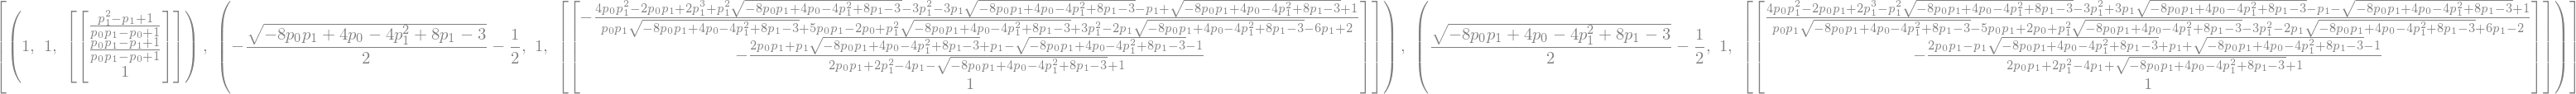

In [8]:
res

Le premier vecteur propre associé à 1 est :

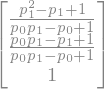

In [9]:
V = res[0][2][0]
V

On le normalise, puis on affiche ses composantes normalisées :

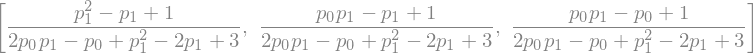

In [10]:
V = V / (V[0,0] + V[1,0] + V[2,0])
[simplify(V[0,0]), simplify(V[1,0]), simplify(V[2,0])]

On peut lire sur le dernier résultat l'expression de la loi stationnaire, qui est bien celle annoncée par le sujet :
$$ \begin{cases} \pi_B(0) = C(1 - p_1(1-p_1)) & \\
\pi_B(1) = C(1 - p_1(1-p_0)) & \\
\pi_B(2) = C(1 - p_0(1-p_1)) \end{cases}$$
Avec $ C = \dfrac{1}{2 + p_0p_1^2 + (1-p_0)(1-p_1)^2}$

Enfin on donne une fonction qui automatisera cette tâche de recherche de loi statique, élaborée d'après l'exemple précèdent.

In [9]:
def get_static_distribution(P) :
    for (eigenval, mult, eigenvects) in P.transpose().eigenvects() :
        if (eigenval == 1) :
            V = eigenvects[0]
            # Désormais on normalise
            return V / (V[0] + V[1] + V[2])
    # en cas d'erreur, si P n'admet pas de loi statique
    return None

**T4.**

Notons $G$ l'évènement "gagner". Alors par la formule des probabilités totales :
$$P(G) = \sum_{1 \leq i \leq 3} P(G | X_n = i)P(X_n = i) = p_0 \pi_B(0) + p_1(\pi_B(1) + \pi_B(2))$$
Enfin, le gain moyen est alors égal à :
$$\gamma_B = 1 \times P(G) - (1 - P(G)) = 2 P(G) - 1$$

**T5**

On représente $\gamma_B$ en fonction de $\varepsilon$ à l'aide des formules précédentes :

<IPython.core.display.Javascript object>


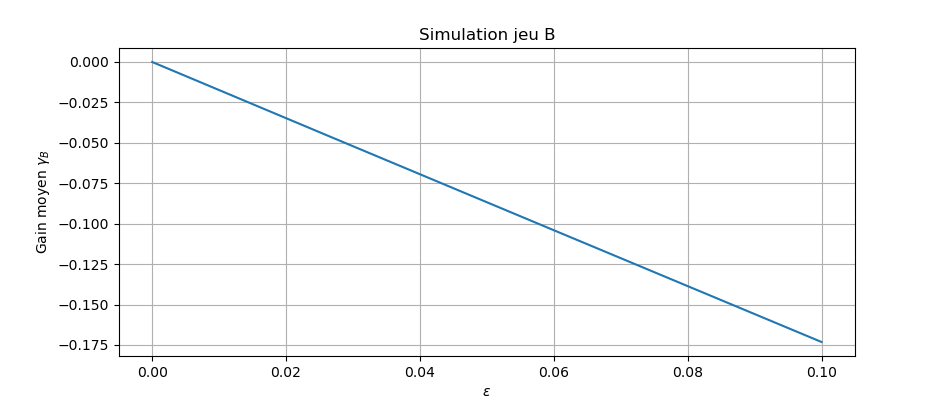

In [10]:
def gammaB (epsilon) :
    p_0 = 1/10 - epsilon
    p_1 = 3/4 - epsilon
    C = 1 / (2 + p_0*(p_1**2) + (1 - p_0)*((1 - p_1)**2))
    pi_0 = C*(1 - p_1*(1-p_1))
    pi_1 = C*(1 - p_1*(1-p_0))
    pi_2 = C*(1 - p_0*(1-p_1))
    return 2*p_0*pi_0 + 2*p_1*(pi_1 + pi_2) - 1

epsilon_min = 0
epsilon_max = 1/10

X = np.linspace(epsilon_min,epsilon_max,150)
plt.figure(figsize=(w, h))
plt.plot(X,gammaB(X))
plt.title("Simulation jeu B")
plt.xlabel(r"$\varepsilon$")
plt.ylabel("Gain moyen " + r"$\gamma_B$")
plt.grid()
plt.show()

Comme le jeu précèdent, le gain moyen est négatif. Cela n'était pas forcément clair dans les premières simulations du jeu $B$ où il était difficile de voir se dégager une tendance, mais le résultat théorique est bien là.

### Partie 2 : Mélange de jeux

**S3.**

Commençons par les simulations, que l'on effectue toujours selon la même logique :

In [11]:
# On simule r jeux successifs de A
def play_A(r) :
    return npr.choice([1, -1], p = [p, 1 - p], size = r).sum()

# On simule s jeux successifs de B. Ici on a 
# cependant besoin de spécifier la valeur initiale 
# de gain actual_value à partir de laquelle on commence à jouer
def play_B(actual_value, s) :
    tmp = actual_value
    for j in range(s) :
        actual_value += npr.choice([1, -1], p = [p1, 1 - p1]) if actual_value % 3 else npr.choice([1, -1], p = [p0, 1 - p0])
    return actual_value - tmp

# Une fonction qui prend le gain actuel et renvoie le gain après r jeux
# de A et s jeux de B
def succ_play_A_B(actual_value, r, s) :
    actual_value += play_A(r)
    return actual_value + play_B(actual_value, s)

# Simulation de S_n en spécifant (r, s)
def simulation(n, r, s) :
    tmp = np.zeros(n)
    tmp[0] = 0
    for i in range(n-1) :
        tmp[i + 1] = succ_play_A_B(tmp[i], r, s)
    return tmp

<IPython.core.display.Javascript object>


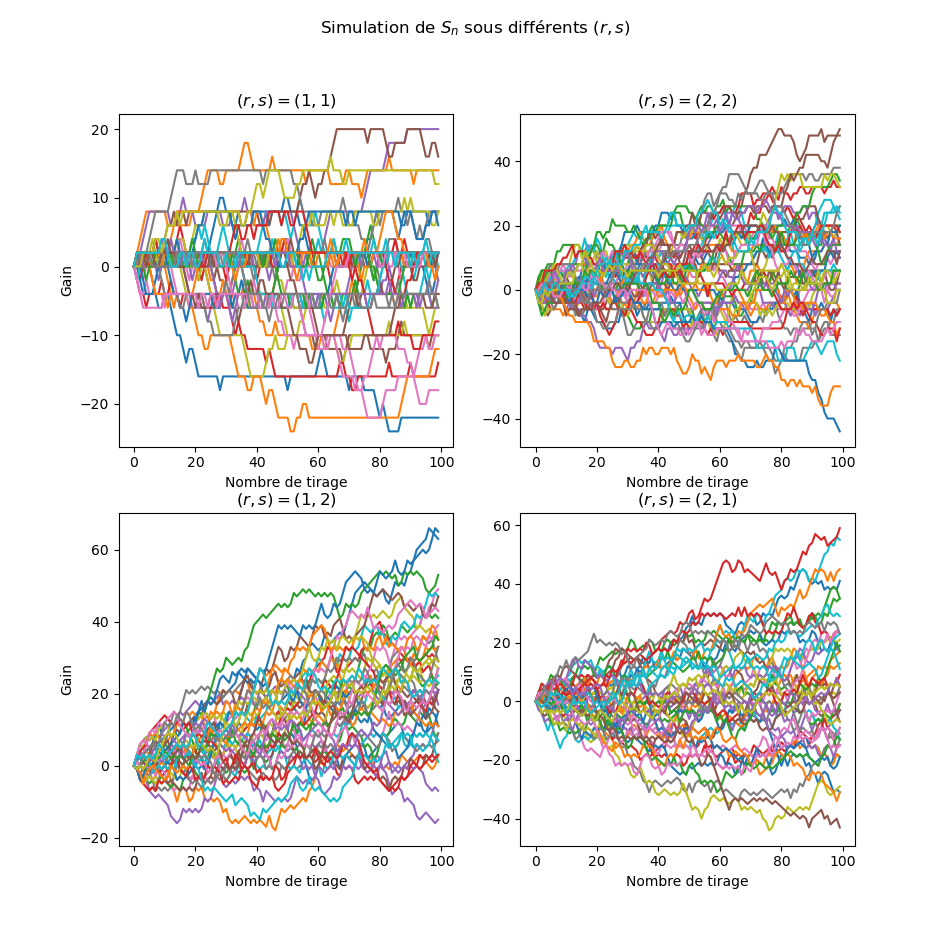

In [12]:
#Les différents (r, s) de la simulation
array_param = [(1,1), (2,2), \
              (1,2), (2,1)]


def display(num_path, n) :
    fig, _ = plt.subplots(ncols=2, nrows=2, figsize=(w, 2*h + 1.5))
    fig.suptitle("Simulation de " + r"$S_n$ sous différents $(r,s)$")
    
    ax1 = plt.subplot(221)
    ax1.set_xlabel("Nombre de tirage")
    ax1.set_ylabel("Gain")
    
    ax2 = plt.subplot(222)
    ax2.set_xlabel("Nombre de tirage")
    ax2.set_ylabel("Gain")
    
    ax3 = plt.subplot(223)
    ax3.set_xlabel("Nombre de tirage")
    ax3.set_ylabel("Gain")
    
    ax4 = plt.subplot(224)
    ax4.set_xlabel("Nombre de tirage")
    ax4.set_ylabel("Gain")
    
    ax1.set_title(r"$(r, s) = {}$".format(array_param[0]))
    ax2.set_title(r"$(r, s) = {}$".format(array_param[1]))
    ax3.set_title(r"$(r, s) = {}$".format(array_param[2]))
    ax4.set_title(r"$(r, s) = {}$".format(array_param[3]))
    
    X = np.arange(n)
    
    #Affichage
    for i in range(num_path) :
        ax1.plot(X, simulation(n, *array_param[0]))
        ax2.plot(X, simulation(n, *array_param[1]))
        ax3.plot(X, simulation(n, *array_param[2]))
        ax4.plot(X, simulation(n, *array_param[3]))
    
    plt.show()


display(50, 100)

Il est assez difficile d'analyser ces courbes. Pourtant, le couple $(r, s) = (1, 2)$ semble se démarquer en ce que les gains ont franchement l'air de croître avec $n$. On peut essayer de s'en convaincre à l'aide d'un histogramme tracé proprement à l'aide d'anciennes fonctions que l'on réutilise :

<IPython.core.display.Javascript object>


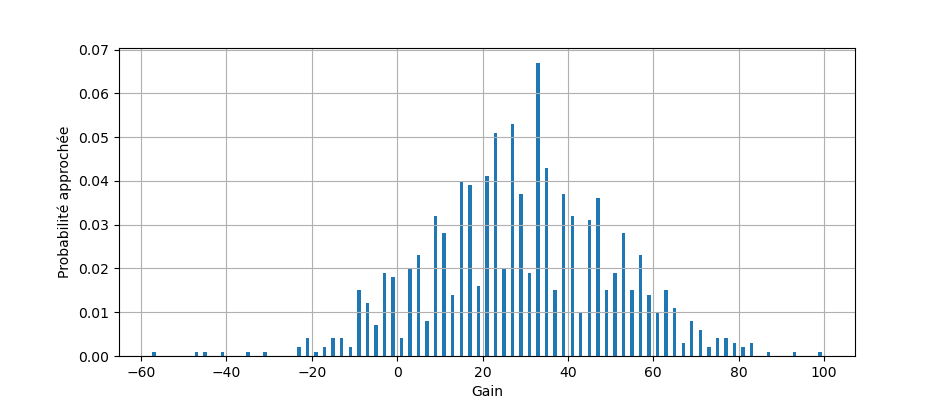

(epsilon = 0.001) Gains moyens pour 1000 parties de 150 lancers : 0.19418666666666667


In [13]:
def display(num_path, path_length) :
    simulations = np.zeros(num_path, dtype = np.int64)
    for i in range(num_path) :
        simulations[i] = simulation(path_length, 1, 2)[-1]
    (a, b, hist) = get_hist(simulations)
    plt.figure(figsize=(w, h))
    plt.bar(np.arange(a, b+1), hist)
    plt.xlabel("Gain")
    plt.ylabel("Probabilité approchée")
    plt.grid()
    plt.show()
    mean_winnings(path_length, simulations)

display(1000, 150)

Effectivement, ce n'était pas qu'une intuition.

**T6.**

Nous allons nous épargner les calculs à l'aide de la bibliothèque Sympy de nouveau. Tout d'abord déterminons $P_{AB}$, sachant que $P_A = \begin{pmatrix} 0 & p & 1 - p \\ 1 - p & 0 & p \\ p & 1-p & 0 \end{pmatrix}$ avec $p = 1/2$ :

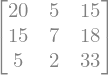

In [16]:
init_printing()

PA = zeros(3,3)
PA[0,0] = Fraction(0,1)
PA[0,1] = Fraction(1,2)
PA[0,2] = Fraction(1,2)
PA[1,0] = Fraction(1,2)
PA[1,1] = Fraction(0,1)
PA[1,2] = Fraction(1,2)
PA[2,0] = Fraction(1,2)
PA[2,1] = Fraction(1,2)
PA[2,2] = Fraction(0,1)
    
PB = zeros(3,3)
PB[0,0] = Fraction(0,1)
PB[0,1] = Fraction(1,10)
PB[0,2] = 1 - Fraction(1,10)
PB[1,0] = 1 - Fraction(3,4)
PB[1,1] = Fraction(0,1)
PB[1,2] = Fraction(3,4)
PB[2,0] = Fraction(3,4)
PB[2,1] = 1 -Fraction(3,4)
PB[2,2] = Fraction(0,1)

PAB = PA * PB

#On multiplie par 40 pour avoir un résultat entier
40 * PAB


Ainsi on a $P_{AB} = \dfrac{1}{40}\begin{pmatrix} 20 & 5 & 15 \\ 15 & 7 & 18 \\ 5 & 2 & 33 \end{pmatrix}$. 
Ensuite, on trouve de nouveau $\pi_{AB}$ en s'intéressant au vecteur propre associé à la valeur propre 1 de $P_{AB}^{\intercal}$ :

In [17]:
# Nous allons expliquer cette fonction un peu plus bas. Elle fait
# le calcul du gain moyen en fonction de P, pi et de 
# 'consecutive_games' le nombre de jeu consécutif joué. La formule
# ne fonctionne que pour certains cas particuliers, qui de toutes manières
# englobent tout ceux que nous allons traiter
def mean_winnings_consecutive_games(P, pi, consecutive_games) :
    if pi is None : return None
    cs = consecutive_games
    return cs*(sum([ (P[i, (i + cs) % 3] - P[i, (i - cs) % 3]) * pi[i] for i in range(3)]))

(Loi statique, gain moyen) : 


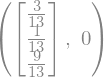

In [18]:
V = get_static_distribution(PAB)
print("(Loi statique, gain moyen) : ")
(V, mean_winnings_consecutive_games(PAB, V, 2))



Cela nous donne bien que $\pi_{AB} = \begin{pmatrix} \frac{3}{13} & \frac{1}{13} & \frac{9}{13} \end{pmatrix} $. Dès lors, il va être relativement simple dans ce cas-ci de calculer $\gamma_{AB}$. En effet, on peut se trouver face à trois situations :
\begin{enumerate}
    \item On gagne au jeu $A$ et au jeu $B$ : le gain est de 2 et $X_{n + 1} \equiv X_{n} + 2$. 
    \item On gagne et on perd une fois. Le gain est nul.
    \item On perd deux fois : le gain est de -2 et $X_{n + 1} \equiv X_{n} + 1$
\end{enumerate}
Ainsi les évènements $X_{n + 1} \equiv X_{n} + 2$ et $X_{n + 1} \equiv X_{n} + 1$ ne correspondent qu'à un résultat de gain possible ce qui nous permet de mener directement les calculs :
$$ \gamma_{AB} = 2 \times P(X_{n + 1} \equiv X_{n} + 2) - 2 \times P(X_{n + 1} \equiv X_{n} + 1)$$
$$\gamma_{AB} = 2 \times \sum_{i = 0}^2 P(X_{n + 1} = i + 2 | X_n = i)\pi_{AB}(i) - 2 \times \sum_{i = 0}^2 P(X_{n + 1} = i + 1 | X_n = i)\pi_{AB}(i)$$
$$\gamma_{AB} = 2 \times \sum_{i = 0}^2 (P_{AB})_{i, i + 2} \pi_{AB}(i) - 2 \times \sum_{i = 0}^2 (P_{AB})_{i, i + 1}\pi_{AB}(i)$$
C'est d'ici que vient la formule des gains moyens appelée ``` mean_winnings_consecutive_games ``` plus haut. consecutive_games correspond au nombre de jeux consécutifs joués. Nous le réutiliserons plus tard. Bref le calcul numérique donne $ \gamma_{AB} = 0$.

**T7.**

On a pu voir sur les calculs précédents que la loi stationnaire s'exprimait comme une fraction rationnelle des différentes probabilités. Comme ceux-ci s'expriment à l'aide de $\varepsilon$, on peut affirmer que $\pi_{AB}$ s'exprime comme fraction rationnelle de $\varepsilon$. Par le même raisonnement on peut affirmer qu'il existe $3\times3$ fractions rationnelles $Q_{i, j} \in \mathbb{Q}[X]$ telles que $P_{AB} = (Q_{i, j}(\varepsilon))_{i, j}$. Enfin, comme on a vu, seul des opérations arithmétiques élémentaires interviennent dans le calcul de $\gamma$ et par conséquent $\gamma = Q(\varepsilon)$, $Q \in \mathbb{Q}[X]$. Enfin, par la question précèdente, $\gamma$ est bien définie en $0$ donc elle y est continue.

Ainsi, lorsque $\varepsilon$ est petit, $\gamma$ est très proche des valeurs précèdemment calculées. Le jeu est ainsi devenu d'espérance nulle pour $r=s=1$, ce que l'on a pu constater sur les premiers graphiques où les gains ne semblaient pas suivre de tendance, mais surtout il semblait que le gain pour $r=s=2$ était proche de 0. La valeur trouvée paraît donc cohérente. Ce que l'on avait conjecturé plus tôt, à savoir que des couples $(r, s)$ pouvait être profitable s'avère de plus en plus consolidé par des résultats théoriques.

Avant de passer à la partie suivante, affichons ces deux cas de figures pour s'en convaincre visuellement. La remarque du sujet suivant la question **T4.** nous permet sereinement de procéder aux simulations à partir de n'importe quel $X_0$. 

<IPython.core.display.Javascript object>


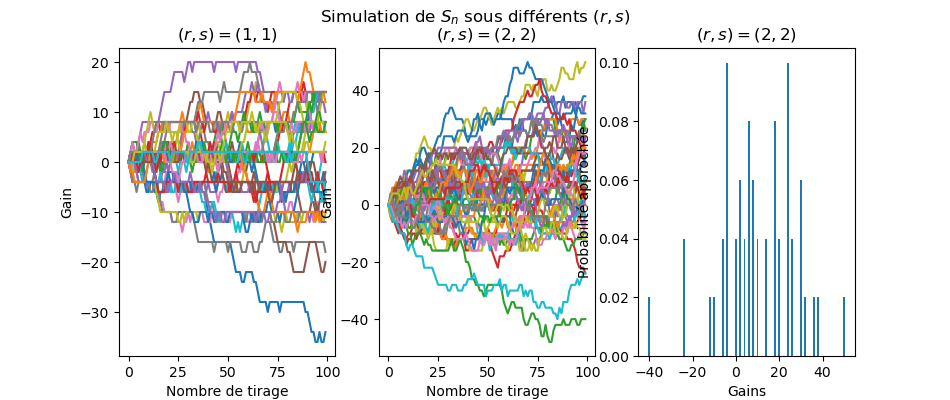

(r, s) = (2, 2) : gains théoriques = 0.09815950920245399
(epsilon = 0.001) Gains moyens pour 50 parties de 100 lancers : 0.0996


In [25]:
def display(num_path, n) :
    
    # Affichage
    fig, _ = plt.subplots(ncols=3, nrows=1, figsize=(w, h))
    fig.suptitle("Simulation de " + r"$S_n$ sous différents $(r,s)$")
    
    ax1 = plt.subplot(131)
    ax1.set_xlabel("Nombre de tirage")
    ax1.set_ylabel("Gain")
    
    ax2 = plt.subplot(132)
    ax2.set_xlabel("Nombre de tirage")
    ax2.set_ylabel("Gain")
    
    ax3 = plt.subplot(133)
    ax3.set_xlabel("Gains")
    ax3.set_ylabel("Probabilité approchée")
    
    ax1.set_title(r"$(r, s) = {}$".format((1,1)))
    ax2.set_title(r"$(r, s) = {}$".format((2,2)))
    ax3.set_title(r"$(r, s) = {}$".format((2,2)))
    
    X = np.arange(n)
    
    # Simulations.
    s1 = np.zeros((num_path, n))
    s2 = np.zeros((num_path, n), dtype=np.int64)
    
    for i in range(num_path) :
        s1[i] = simulation(n, 1,1)
        s2[i] = simulation(n, 2,2)
        
    for i in range(num_path) :
        ax1.plot(X, s1[i])
        ax2.plot(X, s2[i])
    
    final_winnings_list = s2[:, -1]
    (a, b, hist) = get_hist(final_winnings_list)
    ax3.bar(np.arange(a, b+1), hist)
    plt.show()
    print("(r, s) = (2, 2) : gains théoriques =", 16/163)
    mean_winnings(n, final_winnings_list)
    
    plt.show()


display(50, 100)

Les simulations confirment le résultat théorique.

## Partie 3 : Mélange aléatoire

**S4.**

On va créer une suite de v.a i.i.d $\sim \mathcal{B}(1/2)$ pour décider de jouer selon $A$ ou selon $B$. On dira qu'un $1$ correspondra au jeu $A$. 

In [26]:
# Fonction qui simule le jeu C une fois, en précisant un paramètre alpha
# tel que la probabilité de jouer au jeu A est alpha.
# On donne aussi n = path_length. La fonction renverra (S_k)_{0<=k<n}
def play_C(path_length, alpha) :
    game_to_play = npr.choice([1, 0], p = [alpha, 1 - alpha], size = path_length)
    L = np.zeros(path_length, dtype=np.int64)
    for i in range(path_length-1) :
        L[i + 1] = L[i] + (play_A(1) if game_to_play[i] else play_B(L[i], 1))
    return L

# Fonction qui renvoie num_path simulations du jeu C
def simulation_C(num_path, path_length, alpha) :
    simul = np.zeros((num_path, path_length), dtype=np.int64)
    for i in range(len(simul)) :
        simul[i] = play_C(path_length, alpha)
    return simul


<IPython.core.display.Javascript object>


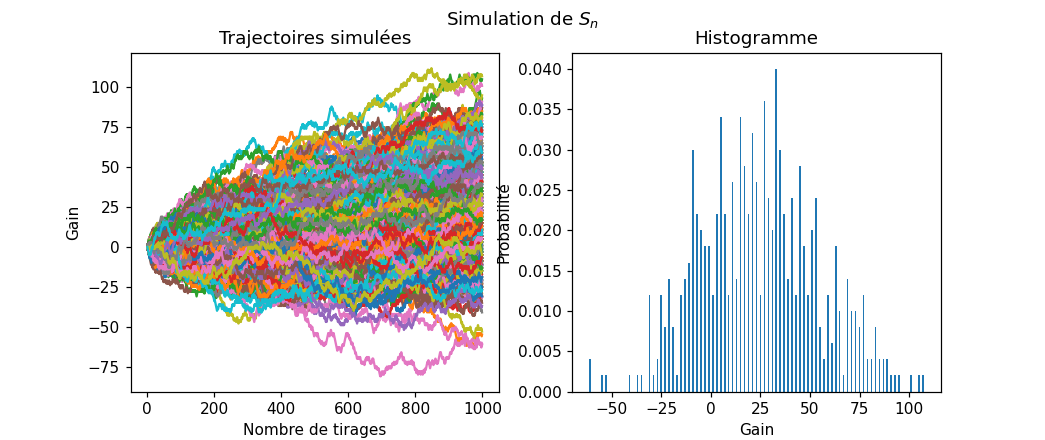

(epsilon = 0.001) Gains moyens pour 500 parties de 1000 lancers : 0.024256


In [27]:
def display(num_path, path_length) :
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(w, h))
    ax1.set_title("Trajectoires simulées")
    ax1.set_xlabel("Nombre de tirages")
    ax1.set_ylabel("Gain")
    ax2.set_title("Histogramme")
    ax2.set_xlabel("Gain")
    ax2.set_ylabel("Probabilité")
    fig.suptitle("Simulation de " + r"$S_n$")
    
    X = np.arange(path_length)
    
    #Calcul des S_n, avec alpha = 1/2
    simul = simulation_C(num_path, path_length, 1/2)
    
    #histogramme
    last_winnings = simul[:, -1]
    (a, b, hist) = get_hist(last_winnings)
    
    #Affichage
    for sim in simul :
        ax1.plot(X, sim)
    ax2.bar(np.arange(a, b+1), hist)
    
    mean_winnings(path_length, last_winnings)
    
    plt.show()

display(500,1000)

Les simulations semblent montrer que les gains sont croissants en $n$, mais assez faiblement. Le gain moyen tournerait autour de $0.02$.

**T8.**

Notons $(B_n)$ la suite de variabes aléatoires i.i.d suivant une loi de Bernoulli de paramètre $\frac{1}{2}$, donnant la décision de jouer le jeu $A$ ou le jeu $B$. Dès lors, on voit que : 
$$ P(X_{n + 1} = j | X_n = i) = P(X_{n + 1} = j | X_n = i, B_n = 1)P(B_n = 1) + P(X_{n + 1} = j | X_n = i, B_n = 0)P(B_n = 0)$$
$$ (P_C)_{i, j} = \dfrac{1}{2}( (P_A)_{i, j} + (P_B)_{i, j} )$$
Bref $P_C = \dfrac{1}{2}(P_A + P_B) = \dfrac{1}{2} \left( \begin{pmatrix} 0 & p & 1 - p \\ 1 - p & 0 & p \\ p & 1-p & 0 \end{pmatrix} + \begin{pmatrix} 0 & p_0 & 1 - p_0 \\ 1 - p_1 & 0 & p_1 \\ p_1 & 1-p_1 & 0 \end{pmatrix} \right) = \dfrac{1}{40} \begin{pmatrix} 0 & 12 & 28 \\ 15 & 0 & 25 \\ 25 & 15 & 0 \end{pmatrix}$

Et enfin on trouve sa loi stationnaire par le même méthode que précédemment.

(Loi statique, gain moyen) : 


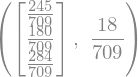

In [28]:
PC = zeros(3,3)
PC[0,0] = Fraction(0,1)
PC[0,1] = Fraction(12,40)
PC[0,2] = Fraction(28,40)
PC[1,0] = Fraction(15,40)
PC[1,1] = Fraction(0,1)
PC[1,2] = Fraction(25,40)
PC[2,0] = Fraction(25,40)
PC[2,1] = Fraction(15,40)
PC[2,2] = Fraction(0,1)

V = get_static_distribution(PC)
print("(Loi statique, gain moyen) : ")
(V, mean_winnings_consecutive_games(PC, V, 1))

On trouve $\pi_C = \begin{pmatrix} \dfrac{245}{709} & \dfrac{180}{709} & \dfrac{284}{709} \end{pmatrix}$ et $\gamma_C = \dfrac{18}{709} \approx 0.025$. Ici on a appliqué ```mean_winnings_consecutive_games``` avec $1$ puisqu'à chaque tour il n'y a qu'un gain de $\pm 1$. La formule marche toujours puisque les évènements $X_{n+1} = X_n + 1$ et $X_{n+1}= X_n - 1$ correspondent exactement aux évènements gagner une partie et perdre une partie.

**T9.**

Les mêmes remarques de continuité précdemment soulevées montrent que lorsque $\varepsilon$ est petit, l'espérance de $S_n$ est approximativement $\gamma_C$, et la suite se comporte asymptotiquement de la même manière.

**S5.**

On procède désormais aux simulations pour différents $\alpha$. On dispose déjà de toutes les fonctions techniques dont nous avons besoin.

<IPython.core.display.Javascript object>


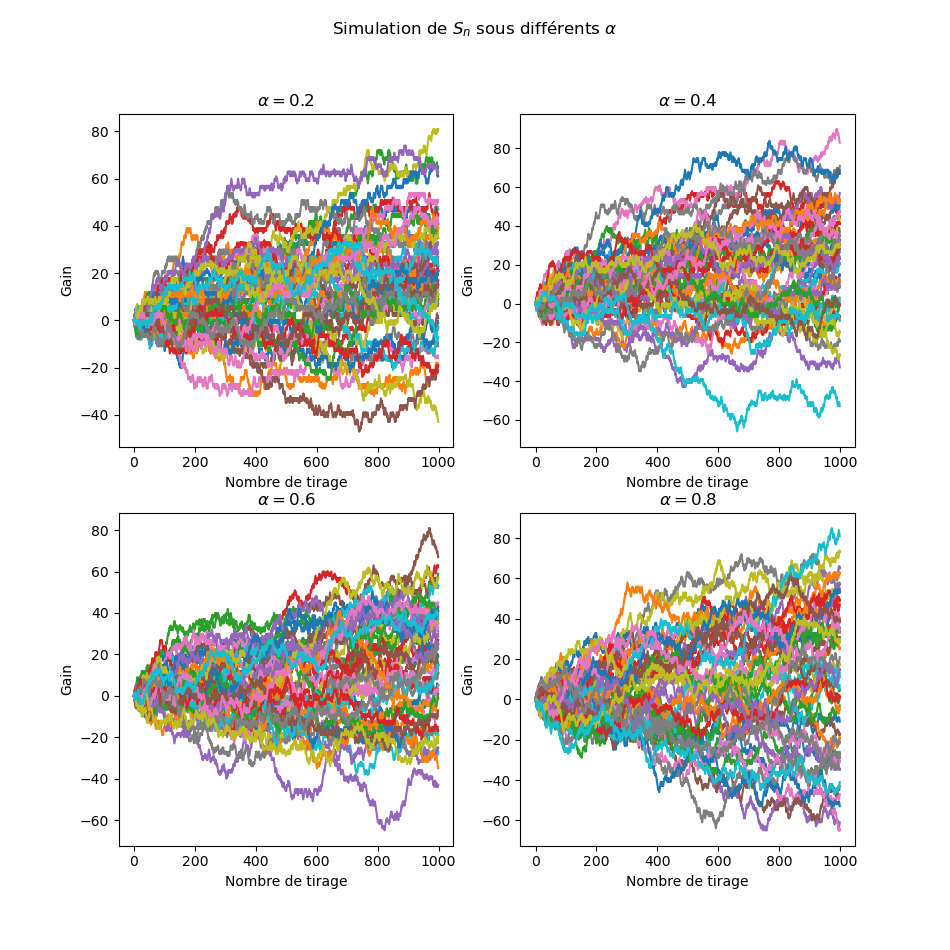

In [71]:
# Affichage pour une liste alphas de taille quelconque
def display(num_path, path_length, alphas) :
    # Variables à définir pour créer une grille carrée assez grande
    col = np.int(np.ceil(np.sqrt(len(alphas))))
    row = np.int(np.ceil(np.sqrt(len(alphas))))
    fig, _ = plt.subplots(ncols= col, nrows= row, figsize=(w, 2*h + 1.5))
    fig.suptitle("Simulation de " + r"$S_n$ sous différents $\alpha$")
    
    X = np.arange(path_length)
    
    #Calcul des S_n, pour les différents alphas
    count = 1
    for alpha in alphas :
        simul = simulation_C(num_path, path_length, alpha)
        ax = plt.subplot(col, row, count)
        ax.set_xlabel("Nombre de tirage")
        ax.set_ylabel("Gain")
        ax.set_title(r"$\alpha = {}$".format(alpha))
        for sim in simul :
            ax.plot(X, sim)
        count += 1
    
    plt.show()

display(50, 1000, [1/5, 2/5, 3/5, 4/5])

Enfin on se propose de comparer gains moyens et gains théoriques, selon différents $\alpha$. On définit donc deux fonctions qui reprennent des logiques déjà introduites. ```gain_moyen_empirique``` procède aux simulations comme on l'a fait plus haut. ```gain_moyen_theorique``` défini la matrice $P_C = \alpha P_A + (1- \alpha) P_B$ (dont l'utilisation se justifie de la même manière que celle que l'on a utilisée pour $\alpha = \frac12$) et utilise la fonction ```mean_winnings_consecutive_games``` comme à chaque fois :

In [29]:
def gain_moyen_empirique(num_path, path_length, alpha) :
    simul = simulation_C(num_path, path_length, alpha)
    final_winnings = simul[:, -1]
    return final_winnings.sum() / (num_path * path_length)

def gain_moyen_theorique(alpha) :
    PC = alpha * PA + (1 - alpha) * PB
    m = mean_winnings_consecutive_games(PC, get_static_distribution(PC), 1)
    return m if m is not None else 0


On a bien fait attention à renvoyer $0$ en cas d'échec du calcul du gain théorique, échec certainement causé par l'incapacité de ```simpy``` à trouver un vecteur propre. Comparons les résultats :

<IPython.core.display.Javascript object>


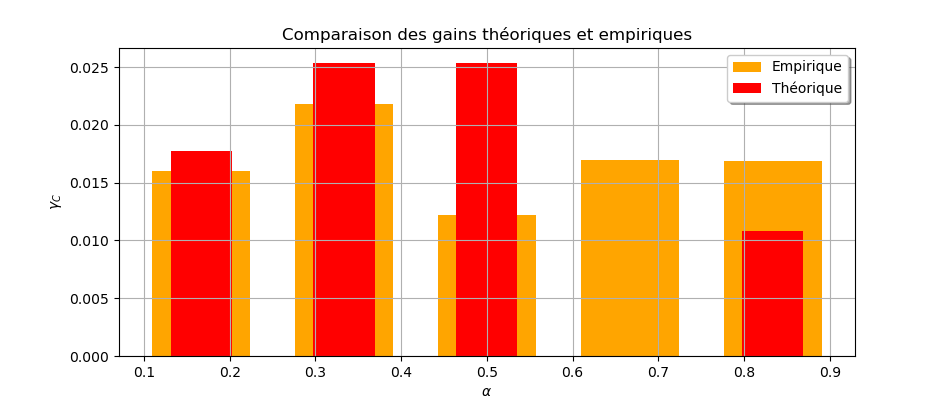

In [28]:
# Déclaration des constantes
num_path, path_length = 100,200

# On subdivise [0, 1] en 'subdivisions' subdivisions. Cela définira les alphas
subdivisions = 7
alpha = np.linspace(0, 1, subdivisions)[1:-1]

# Calcul des couples gains moyens empiriques et théoriques
L = [(gain_moyen_empirique(num_path, path_length, a), gain_moyen_theorique(a)) for a in alpha]

#Affichage
plt.figure(figsize=(w, h))
plt.title("Comparaison des gains théoriques et empiriques")
plt.bar(alpha, [L[i][0] for i in range(len(L))], label = "Empirique", color='orange', width = 0.8 / subdivisions)
plt.bar(alpha, [L[i][1] for i in range(len(L))], label = "Théorique", color='red', width = 0.5 / subdivisions)
plt.legend(shadow='True')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\gamma_{C}$")
plt.grid()
plt.show()

Les résultats empiriques sont très proches des résultats théoriques : tout semble bien correct. Enfin on peut se proposer de donner une valeur explicite du gain moyen théorique en suivant le même cheminement que précèdemment et les outils puissants de Python. On pourra alors clairement voir pour quels couples $(\alpha, \varespilon)$ le gain moyen est positif. Cela concluera.

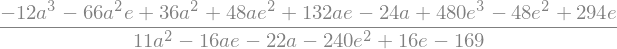

In [34]:
init_printing()

# Déclaration des symboles pour le calcul formel
epsi = Symbol('e')
alph = Symbol('a')

# Les différentes probas
proba0 = Fraction(1,10) - epsi
proba1 = Fraction(3,4) - epsi
proba = Fraction(1,2) - epsi

# Les deux matrices P_A et P_B
PA = zeros(3,3)
PA[0,0] = Fraction(0,1)
PA[0,1] = proba
PA[0,2] = 1 - proba
PA[1,0] = 1 - proba
PA[1,1] = 0
PA[1,2] = proba
PA[2,0] = proba
PA[2,1] = 1 - proba
PA[2,2] = Fraction(0,1)
    
PB = zeros(3,3)
PB[0,0] = Fraction(0,1)
PB[0,1] = proba0
PB[0,2] = 1 - proba0
PB[1,0] = 1 - proba1
PB[1,1] = Fraction(0,1)
PB[1,2] = proba1
PB[2,0] = proba1
PB[2,1] = 1 - proba1
PB[2,2] = Fraction(0,1)

# Déclaration de P_C
PC = alph * PA + ( 1 - alph ) * PB

# Détermination de la loi stationnaire
V = get_static_distribution(PC)

# Puis calcul du gain moyen
mean_alpha_epsilon = simplify(mean_winnings_consecutive_games(PC, V, 1))
mean_alpha_epsilon

On peut d'ailleurs voir pour quels $\alpha$ cette fonction n'est pas défini :

alpha dans 

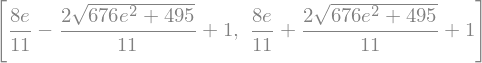

In [35]:
from sympy import fraction
from sympy.solvers import solve
_, denom = fraction(mean_alpha_epsilon)
undef = solve(denom, alph)
print("alpha dans ", end = "")
undef

Ainsi, il y a annulation du dénominateur pour $\alpha_0 = \dfrac{8e}{11} - \dfrac{2\sqrt{676e^2 + 495}}{11} + 1 \leq \dfrac{8}{11} - \dfrac{2\sqrt{495}}{11} + 1 < 1 - \dfrac{2\times 22}{11} + 1= 0 $ ou pour $\alpha_1 = \dfrac{8e}{11} + \dfrac{2\sqrt{676e^2 + 495}}{11} + 1 > 1$. Bref il n'y a pas d'annulation du dénominateur sur $[0, 1]$ et le gain moyen théorique est toujours bien défini. On donne enfin une fonction renvoyant le gain moyen en fonction de $\alpha$ et $\varepsilon$.

In [36]:
def get_mean_winnings_theory(alp, eps) :
    return mean_alpha_epsilon.subs([(alph, alp),  (epsi, eps)])

On peut par exemple rapidement retrouver le résultat de la question 

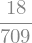

In [37]:
get_mean_winnings_theory(Fraction(1/2), Fraction(0))

Pour finir on peut tracer les gains moyens en fonction de $\alpha$ et $\epsilon$. On peut voir grossièrement qu'autour de $(\alpha, \varepsilon) = (\frac{1}{2}, 0)$ les gains sont positifs et maximum :

<IPython.core.display.Javascript object>


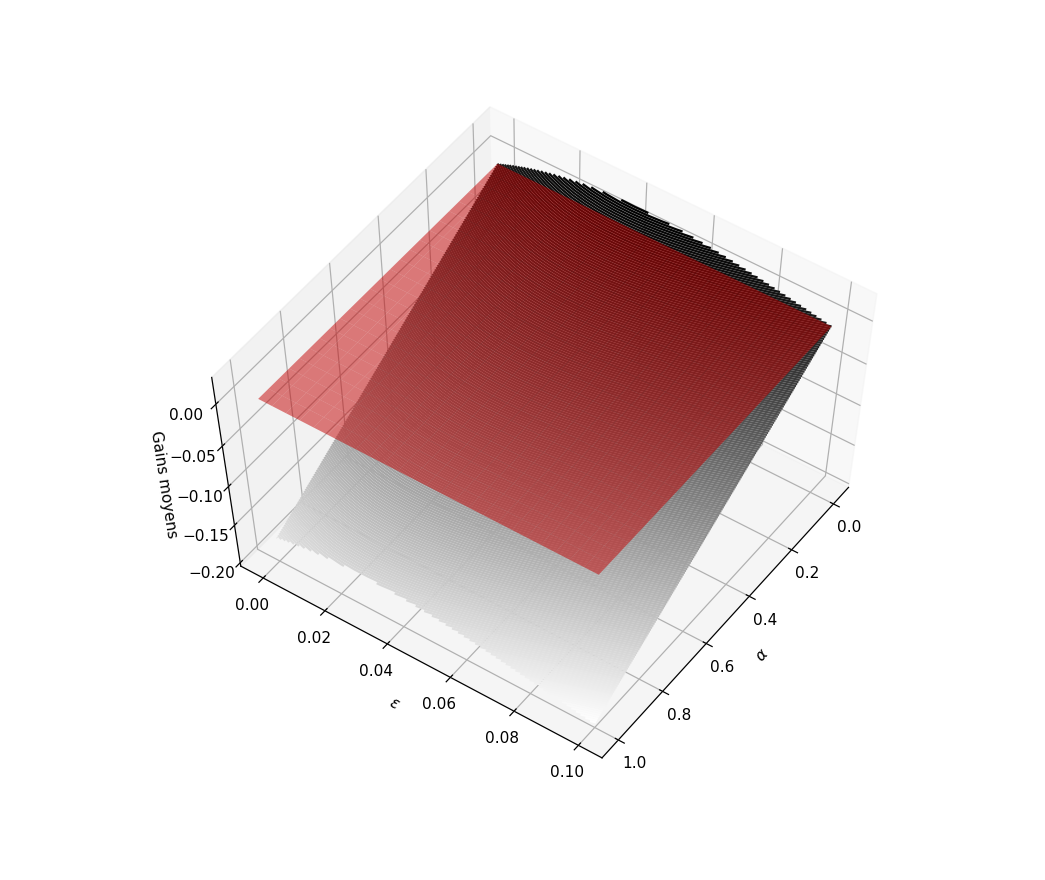

In [39]:
# Nombre d'échantillons par dimension. 
samples = 25
x = np.linspace(0,1,samples)
y = np.linspace(0,1/10,samples)

# Calcul des valeurs de la fonction. Comme la courbe est relativement douce
# On a subdivisé l'espace en un maillage uniforme
z = np.zeros((x.size, y.size))
for i in range(x.size) :
    for j in range(y.size) :
        z[i, j] = get_mean_winnings_theory(x[i], y[j])

X, Y = np.meshgrid(x,y)

# Affichage
fig = plt.figure(figsize=(w, 2*h))
ax = plt.axes(projection='3d')
ax.view_init(60, 35)
ax.contour3D(X, Y, z, 250, cmap='binary')
ax.plot_surface(X, Y, np.zeros((x.size, y.size)), alpha=0.5, color='red')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\varepsilon$')
ax.set_zlabel('Gains moyens')
ax.grid()


On a également tracé le plan $z = 0$ en rouge pour bien se rendre compte de la zone où le gain moyen est positif. Cela conclut notre étude.